In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns, index=X_test.index)


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=0.01)
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]
0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_logreg))
print(accuracy_score(y_test,y_pred_logreg))
print(classification_report(y_test,y_pred_logreg))

[[ 0 11  8]
 [ 0  0 13]
 [ 0  0 13]]
0.28888888888888886
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        13
           2       0.38      1.00      0.55        13

    accuracy                           0.29        45
   macro avg       0.13      0.33      0.18        45
weighted avg       0.11      0.29      0.16        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test, y_pred_nb))
print(accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

[[19  0  0]
 [ 0 12  1]
 [ 0  1 12]]
0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



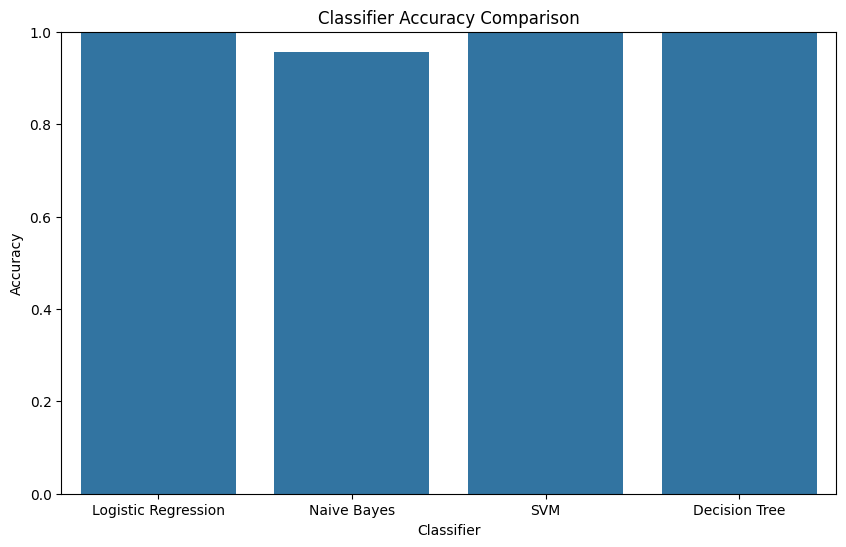

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy')
}
accuracies = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

#plot the graph

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()


In [ ]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy')
}

# Dictionary to store accuracy results
accuracies = {}
confusion_matrices = {}

# Train each classifier and evaluate
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

    # Print the accuracy
    print(f'Accuracy of {name}: {accuracy:.2f}')


Accuracy of Logistic Regression: 1.00
Accuracy of Naive Bayes: 0.98
Accuracy of SVM: 1.00
Accuracy of Decision Tree: 1.00
